In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
housing_df = pd.read_csv('D:/Datasets/housing/housing.csv')

In [3]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Text(0.5, 0, 'House Values')

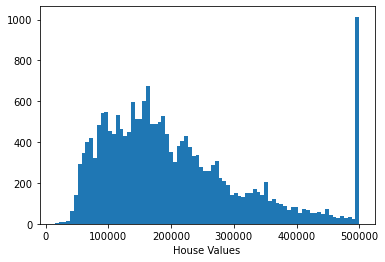

In [4]:
# Ploting the distribution of target data i.e. "median_house_value" feature in this dataset
plt.hist(housing_df['median_house_value'], bins=80)
plt.xlabel("House Values")

## We can see from the plot that Median house value is normally distributed with few outliers at 500000
# Also most of the house values are around 100000 to 200000 range

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

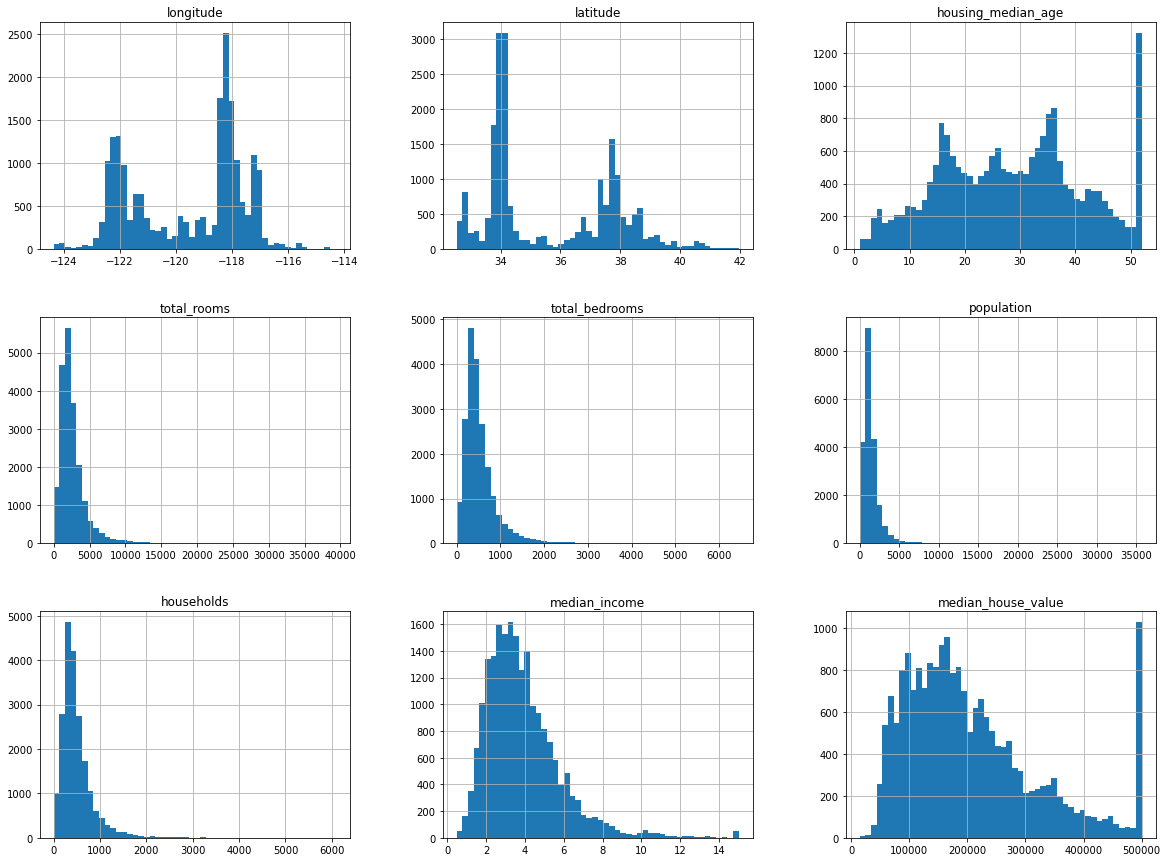

In [5]:
# Visualing all the features and their distribution with the help of histogram
housing_df.hist(bins=50, figsize=(20,15))

In [6]:
corr = housing_df.corr()
print(corr)

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.099773    0.055310      -0.015176   
latitude                 -0.066983   -0.108785   -0.071035      -0.079809   
housing_

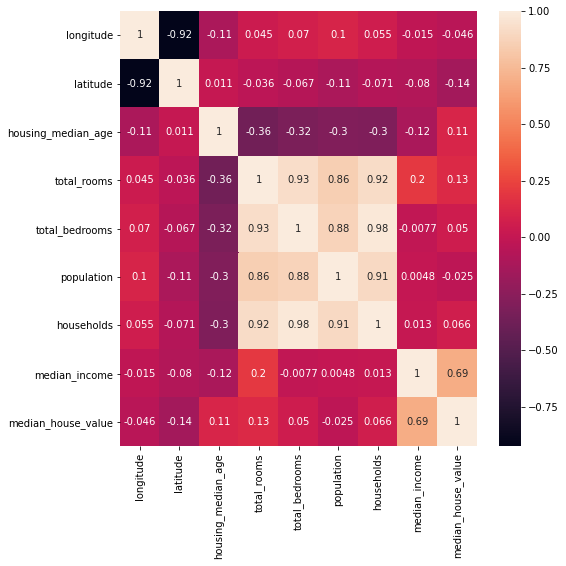

In [7]:
# Ploting Heat Map to understand correlation between each pair of features in the dataset
plt.figure(figsize=(8,8))
sns.heatmap(corr, annot=True)
plt.show()

# Heat Map Shows there is a high correlation between total_rooms, total_bedrooms, population and household features

In [8]:
# Features having missing values
housing_df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [9]:
# Calculating percentage of missing data
housing_df['total_bedrooms'].isnull().sum()/housing_df.shape[0]*100

1.002906976744186

In [10]:
# handling the missing data by imputation using mode value
housing_df['total_bedrooms'] = housing_df['total_bedrooms'].fillna(housing_df['total_bedrooms'].mode()[0])

In [11]:
housing_df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [12]:
# As some of the features are highly correlated to each other, we will combine them with ratio and remove the highly correlated ones
# a new feature that is ratio of total_rooms to households
housing_df['rooms_per_household'] = housing_df['total_rooms']/housing_df['households']

In [13]:
# a new feature that is ratio of total_bedrooms to total_rooms
housing_df['bedrooms_per_room'] = housing_df['total_bedrooms']/housing_df['total_rooms']

In [14]:
# a new feature that is ratio of population to households
housing_df['population_per_household'] = housing_df['population']/housing_df['households']

In [15]:
# a new feature that is ratio of longitude to latitude
housing_df['coords'] = housing_df['longitude']/housing_df['latitude']

In [16]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20640 non-null  float64
 1   latitude                  20640 non-null  float64
 2   housing_median_age        20640 non-null  float64
 3   total_rooms               20640 non-null  float64
 4   total_bedrooms            20640 non-null  float64
 5   population                20640 non-null  float64
 6   households                20640 non-null  float64
 7   median_income             20640 non-null  float64
 8   median_house_value        20640 non-null  float64
 9   ocean_proximity           20640 non-null  object 
 10  rooms_per_household       20640 non-null  float64
 11  bedrooms_per_room         20640 non-null  float64
 12  population_per_household  20640 non-null  float64
 13  coords                    20640 non-null  float64
dtypes: flo

In [17]:
# removing total_rooms, total_bedrooms, population, households, longitude, and latitude 
housing_df=housing_df.drop('total_rooms', axis=1)
housing_df=housing_df.drop('total_bedrooms', axis=1)
housing_df=housing_df.drop('population', axis=1)
housing_df=housing_df.drop('households', axis=1)
housing_df=housing_df.drop('longitude', axis=1)
housing_df=housing_df.drop('latitude', axis=1)

In [18]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   housing_median_age        20640 non-null  float64
 1   median_income             20640 non-null  float64
 2   median_house_value        20640 non-null  float64
 3   ocean_proximity           20640 non-null  object 
 4   rooms_per_household       20640 non-null  float64
 5   bedrooms_per_room         20640 non-null  float64
 6   population_per_household  20640 non-null  float64
 7   coords                    20640 non-null  float64
dtypes: float64(7), object(1)
memory usage: 1.3+ MB


In [19]:
corr = housing_df.corr()
print(corr)

                          housing_median_age  median_income  \
housing_median_age                  1.000000      -0.119034   
median_income                      -0.119034       1.000000   
median_house_value                  0.105623       0.688075   
rooms_per_household                -0.153277       0.326895   
bedrooms_per_room                   0.138846      -0.583353   
population_per_household            0.013191       0.018766   
coords                             -0.019926      -0.107148   

                          median_house_value  rooms_per_household  \
housing_median_age                  0.105623            -0.153277   
median_income                       0.688075             0.326895   
median_house_value                  1.000000             0.151948   
rooms_per_household                 0.151948             1.000000   
bedrooms_per_room                  -0.247152            -0.395350   
population_per_household           -0.023737            -0.004852   
coords      

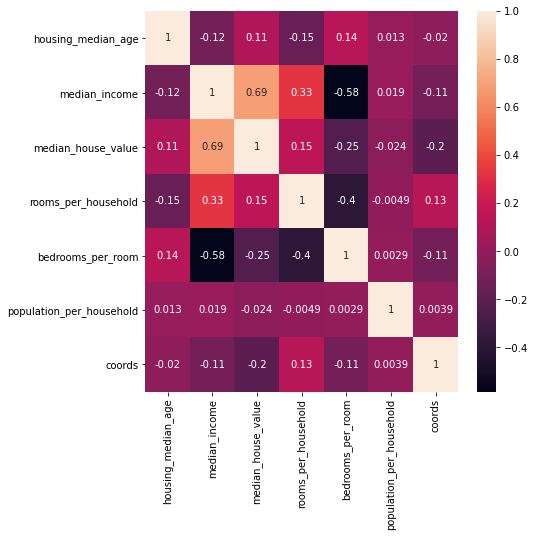

In [20]:
# Ploting the heat map with new features showing no high correlation between features
plt.figure(figsize=(7,7))
sns.heatmap(corr, annot=True)
plt.show()

In [21]:
# Encoding Categorical data as only numeric data is required
housing_df.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [22]:
housing_df["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [23]:
# One-hot-encoding using getdummies function from Pandas library
print(pd.get_dummies(housing_df["ocean_proximity"]))

       <1H OCEAN  INLAND  ISLAND  NEAR BAY  NEAR OCEAN
0              0       0       0         1           0
1              0       0       0         1           0
2              0       0       0         1           0
3              0       0       0         1           0
4              0       0       0         1           0
...          ...     ...     ...       ...         ...
20635          0       1       0         0           0
20636          0       1       0         0           0
20637          0       1       0         0           0
20638          0       1       0         0           0
20639          0       1       0         0           0

[20640 rows x 5 columns]


In [24]:
housing_df_encoded = pd.get_dummies(data = housing_df, columns= ['ocean_proximity'])
housing_df_encoded.head()

,housing_median_age,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,coords,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,41.0,8.3252,452600.0,6.984127,0.146591,2.555556,-3.226769,0,0,0,1,0
1,21.0,8.3014,358500.0,6.238137,0.155797,2.109842,-3.228209,0,0,0,1,0
2,52.0,7.2574,352100.0,8.288136,0.129516,2.802260,-3.229590,0,0,0,1,0
3,52.0,5.6431,341300.0,5.817352,0.184458,2.547945,-3.229855,0,0,0,1,0
4,52.0,3.8462,342200.0,6.281853,0.172096,2.181467,-3.229855,0,0,0,1,0


In [25]:
X = housing_df_encoded.drop('median_house_value', axis=1)

In [26]:
X.head()

,housing_median_age,median_income,rooms_per_household,bedrooms_per_room,population_per_household,coords,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,41.0,8.3252,6.984127,0.146591,2.555556,-3.226769,0,0,0,1,0
1,21.0,8.3014,6.238137,0.155797,2.109842,-3.228209,0,0,0,1,0
2,52.0,7.2574,8.288136,0.129516,2.802260,-3.229590,0,0,0,1,0
3,52.0,5.6431,5.817352,0.184458,2.547945,-3.229855,0,0,0,1,0
4,52.0,3.8462,6.281853,0.172096,2.181467,-3.229855,0,0,0,1,0


In [27]:
y = housing_df_encoded['median_house_value']

In [28]:
y.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

In [29]:
# Spliting data into training and testing datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, shuffle=True, test_size=0.3)

In [30]:
# Removing special characters from the column names from the dataset

import re

regex = re.compile(r"\[|\]|<", re.IGNORECASE)

X_train.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_train.columns.values]
X_test.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_test.columns.values]

# Linear Regression Training Model

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

LinearRegression()

In [33]:
y_pred_test = reg_model.predict(X_test)

In [34]:
pred_test_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
pred_test_df

,Actual,Predicted
20046,47700.0,47710.935779
3024,45800.0,61493.650618
15663,500001.0,193152.399489
20484,218600.0,255245.725211
9814,278000.0,208620.423761
...,...,...
17505,237500.0,209304.634501
13512,67300.0,74640.438821
10842,218400.0,215452.143080
16559,119400.0,125811.202747


In [35]:
#calculating the R^2 value for Linear Regression

r2_reg_model_test = round(reg_model.score(X_test, y_test),2)
print ("R^2 Test: {}".format(r2_reg_model_test))

R^2 Test: 0.59


# Random Forest Regressor Model training

In [36]:

from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=10, random_state=10)

In [37]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=10)

In [38]:
# run the prediction for Random Forest

y_rf_pred_test = rf_model.predict(X_test)

In [39]:
# evaluating the model by comparing predicted with actual values

rf_pred_test_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_rf_pred_test})
rf_pred_test_df

,Actual,Predicted
20046,47700.0,51810.0
3024,45800.0,295140.5
15663,500001.0,442670.3
20484,218600.0,262590.0
9814,278000.0,211490.0
...,...,...
17505,237500.0,241580.1
13512,67300.0,72000.0
10842,218400.0,202330.0
16559,119400.0,129890.0


In [40]:
#calculating the R^2 value for Random Forest Regressor model

from sklearn.metrics import r2_score

score = r2_score(y_test, y_rf_pred_test)

print("R^2 - {}%".format(round(score, 2)* 100))

R^2 - 76.0%


# Extreme Gradient Boosting (XGBoost)

In [43]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [41]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor()

In [42]:
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [43]:
# run the prediction for XGBoost

y_xgb_pred_test = xgb_model.predict(X_test)

In [44]:
# evaluating the model by comparing predicted with actual values

xgb_pred_test_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_xgb_pred_test})
xgb_pred_test_df

,Actual,Predicted
20046,47700.0,63146.371094
3024,45800.0,370533.687500
15663,500001.0,476288.937500
20484,218600.0,296511.062500
9814,278000.0,363983.593750
...,...,...
17505,237500.0,235731.750000
13512,67300.0,62024.582031
10842,218400.0,233399.000000
16559,119400.0,125443.164062


In [45]:
#calculating the R^2 value for XGBoost model

from sklearn.metrics import r2_score

score = r2_score(y_test, y_xgb_pred_test)

print("R^2 - {}%".format(round(score, 2)* 100))

R^2 - 75.0%
